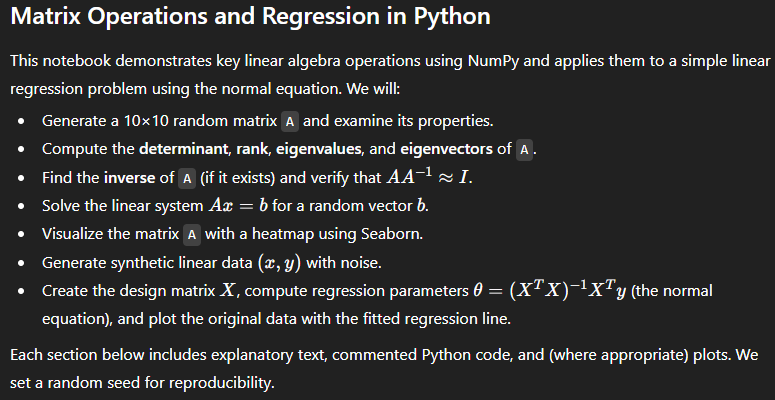

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(0)

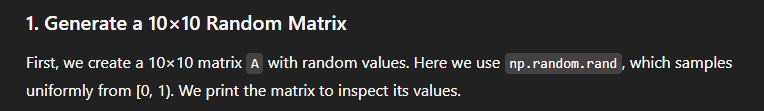

In [2]:
# Generate a 10x10 matrix with random values in [0, 1)
A = np.random.rand(10, 10)
print("Matrix A (10×10 random values):\n", A)


Matrix A (10×10 random values):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676 0.16130952
  0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
  0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358 0.03918779
  0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.5

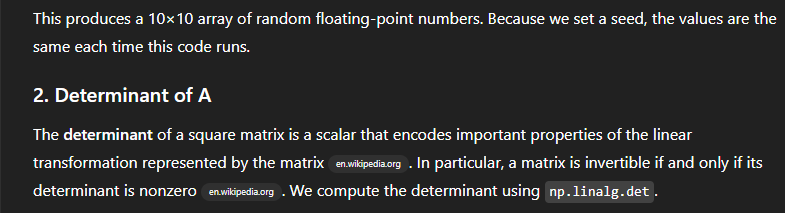

In [3]:
det_A = np.linalg.det(A)
print("Determinant of A:", det_A)


Determinant of A: 0.012191309322200526


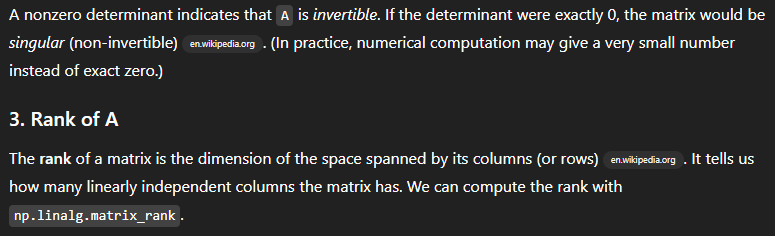

In [4]:
rank_A = np.linalg.matrix_rank(A)
print("Rank of A:", rank_A)


Rank of A: 10


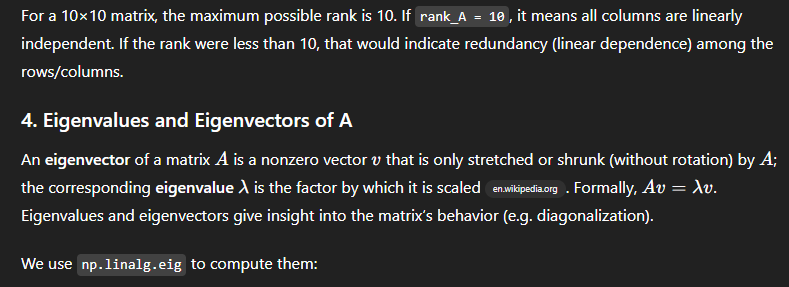

In [5]:
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues of A:", eigvals)


Eigenvalues of A: [ 4.82560951+0.j          0.96051159+0.j          0.82240406+0.j
 -0.79839069+0.07484428j -0.79839069-0.07484428j -0.44630083+0.03292521j
 -0.44630083-0.03292521j  0.07378631+0.35314111j  0.07378631-0.35314111j
  0.19081499+0.j        ]


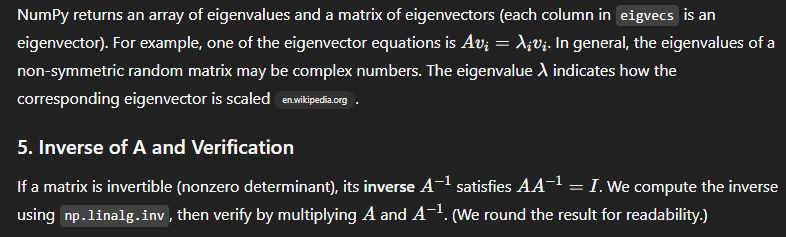

In [6]:
if det_A != 0:
    A_inv = np.linalg.inv(A)
    print("A * A_inv ≈ Identity:\n", np.round(np.dot(A, A_inv), 3))
else:
    print("A is singular; no inverse exists.")


A * A_inv ≈ Identity:
 [[ 1.  0. -0.  0. -0.  0.  0.  0. -0.  0.]
 [-0.  1.  0.  0.  0.  0.  0. -0.  0.  0.]
 [-0.  0.  1. -0.  0.  0.  0. -0.  0.  0.]
 [-0.  0.  0.  1.  0.  0. -0. -0. -0.  0.]
 [-0.  0. -0.  0.  1.  0.  0.  0. -0.  0.]
 [ 0. -0. -0.  0.  0.  1. -0.  0. -0. -0.]
 [-0.  0. -0.  0.  0.  0.  1.  0. -0. -0.]
 [-0.  0. -0. -0.  0.  0.  0.  1. -0.  0.]
 [-0. -0.  0.  0.  0.  0.  0. -0.  1.  0.]
 [ 0.  0.  0. -0.  0.  0. -0. -0. -0.  1.]]


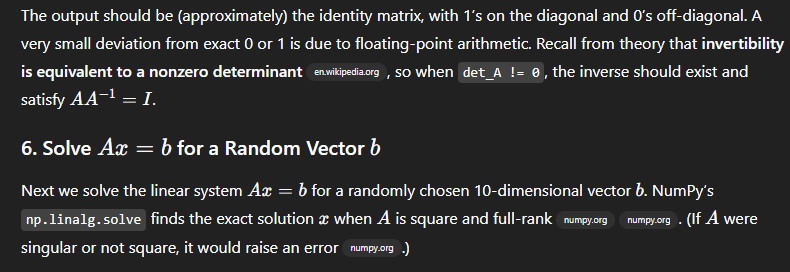

In [7]:
b = np.random.rand(10)
x = np.linalg.solve(A, b)
print("Solution x (first 3 elements):", x[:3])
# Verify the solution by checking Ax ≈ b
print("Check Ax ≈ b:", np.allclose(np.dot(A, x), b))


Solution x (first 3 elements): [-0.97479192  0.58866085  0.75411335]
Check Ax ≈ b: True


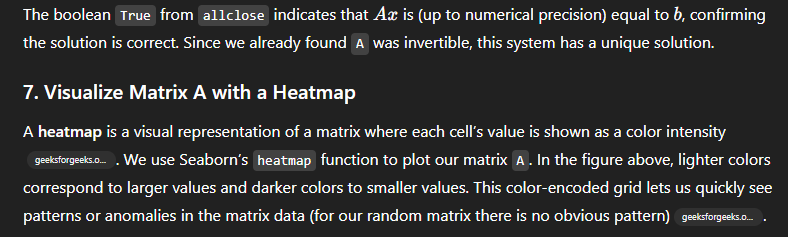

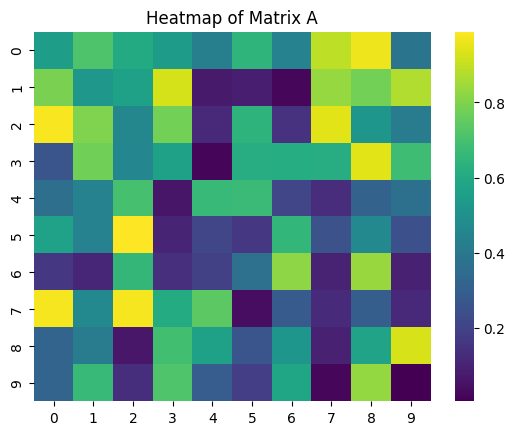

In [8]:
sns.heatmap(A, cmap='viridis')
plt.title("Heatmap of Matrix A")
plt.show()


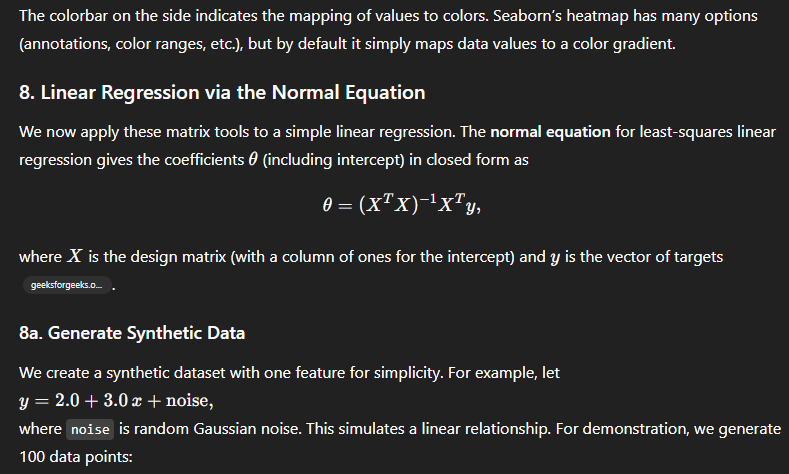

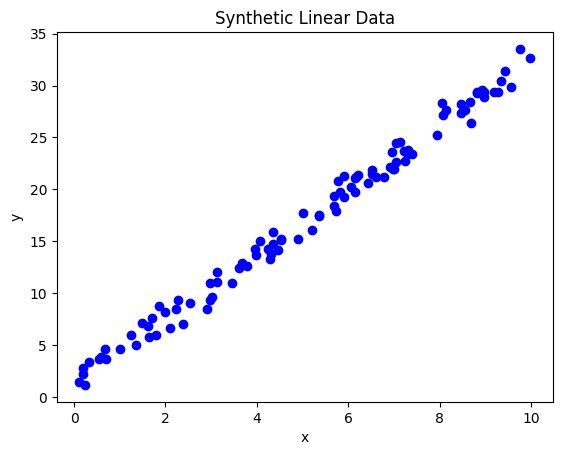

In [9]:
# Generate synthetic linear data with noise
x = np.random.rand(100) * 10  # 100 values in [0, 10)
y = 2.0 + 3.0*x + np.random.randn(100)  # linear relation with Gaussian noise

# (Optional) Plot the raw data
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Linear Data')
plt.show()


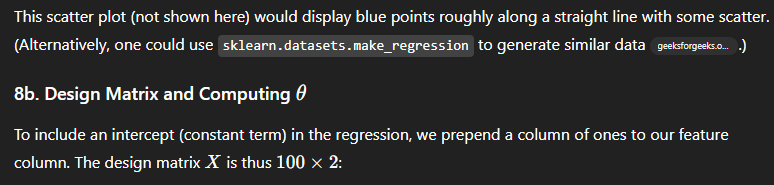

In [10]:
# Construct design matrix with a column of ones and column of x
X = np.vstack([np.ones(len(x)), x]).T  # shape (100, 2)


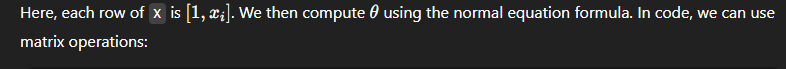

In [11]:
# Compute theta = (X^T X)^{-1} X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print("Regression coefficients (theta):", theta)


Regression coefficients (theta): [1.38138208 3.09075387]


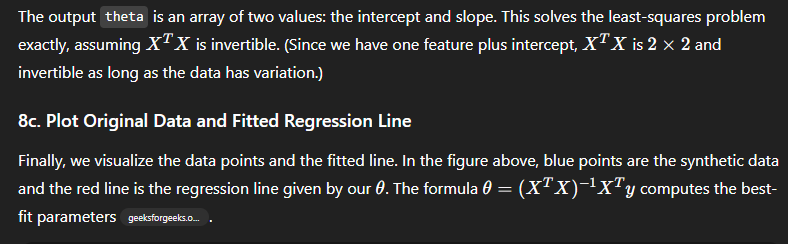

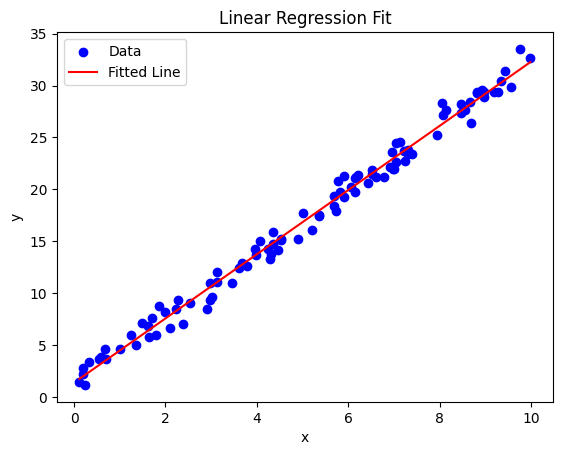

In [14]:
# Compute predicted values
y_pred = X @ theta

# Sort by x for plotting the line
sort_idx = np.argsort(x)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x[sort_idx], y_pred[sort_idx], color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


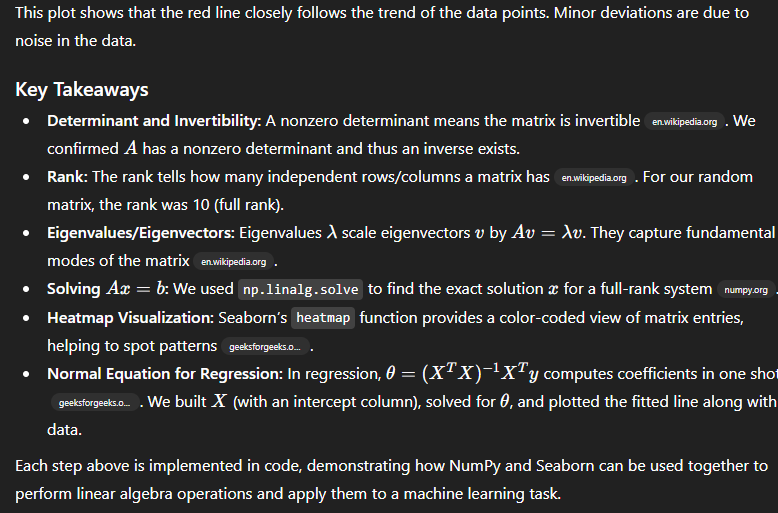